In [1]:
# MSFR 경로 지정

import sys

sys.path.append('../..')

In [2]:
# MSFR 레이어 단일 모델

from torch import Tensor
from torch import device
import torch.nn as nn
from msfr import MSFR

dev = device('cpu')

class MSFRModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)

        self.msfr = MSFR(1, 1, device=dev)

    def forward(self, x: Tensor) -> Tensor:
        print(f"Shape of X: {x.shape}")
        result = self.msfr(x)
        print(f"Shape of result: {result.shape}")
        return result


In [3]:
# 샘플 데이터 생성

import random
from torch import Tensor
from torch import randint
from torch import sin

x_values = [random.uniform(0, 30) for _ in range(100)]
x_tensor = Tensor(x_values, device=dev).view(-1, 1)  # (50, 1) 형태로 변환
y_tensor = 10*sin(x_tensor) + (randint(-1, 2, x_tensor.shape).float() * 0.5)  # 약간의 노이즈 추가


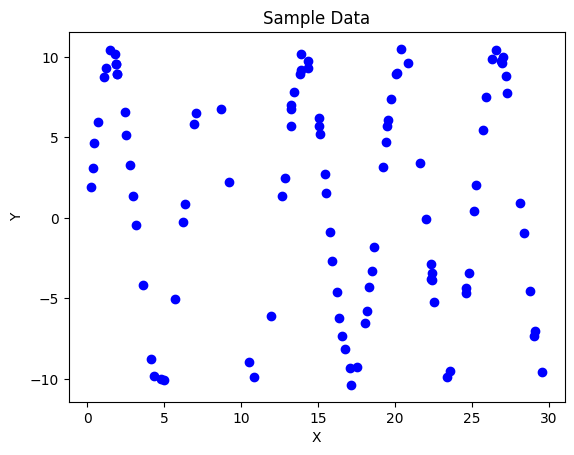

In [4]:
# 샘플 데이터 시각화

import matplotlib.pyplot as plt

plt.scatter(x_tensor.numpy(), y_tensor.numpy(), color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sample Data')
plt.show()

In [5]:
# 모델 학습 및 출력 확인

from torch.optim import Adam
from torch.nn import MSELoss

model = MSFRModel()
optimizer = Adam(model.parameters(), lr=1e-3)
loss_fn = MSELoss()

epochs = 100
for epoch in range(1, epochs + 1):
    output = model(x_tensor)
    loss = loss_fn(output, y_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch}, Loss: {loss.item()}")

Shape of X: torch.Size([100, 1])
Angle shape: torch.Size([100, 1, 3])
Features shape before flattening: torch.Size([100, 1, 6])
Features shape after flattening: torch.Size([100, 6])
Shape of result: torch.Size([100, 1])
Epoch 1, Loss: 48.554718017578125
Shape of X: torch.Size([100, 1])
Angle shape: torch.Size([100, 1, 3])
Features shape before flattening: torch.Size([100, 1, 6])
Features shape after flattening: torch.Size([100, 6])
Shape of result: torch.Size([100, 1])
Epoch 2, Loss: 48.500389099121094
Shape of X: torch.Size([100, 1])
Angle shape: torch.Size([100, 1, 3])
Features shape before flattening: torch.Size([100, 1, 6])
Features shape after flattening: torch.Size([100, 6])
Shape of result: torch.Size([100, 1])
Epoch 3, Loss: 48.44510269165039
Shape of X: torch.Size([100, 1])
Angle shape: torch.Size([100, 1, 3])
Features shape before flattening: torch.Size([100, 1, 6])
Features shape after flattening: torch.Size([100, 6])
Shape of result: torch.Size([100, 1])
Epoch 4, Loss: 48.3

In [6]:
# 모델 학습 결과 출력

from torch import no_grad

with no_grad():
    predicted = model(x_tensor)
    print("Predicted values:", predicted.squeeze().numpy())

Shape of X: torch.Size([100, 1])
Angle shape: torch.Size([100, 1, 3])
Features shape before flattening: torch.Size([100, 1, 6])
Features shape after flattening: torch.Size([100, 6])
Shape of result: torch.Size([100, 1])
Predicted values: [ 6.15478605e-02  1.98903084e-02  2.91548818e-02  2.38050386e-01
  1.02396309e-02  2.03812405e-01 -5.89124084e-01 -7.94640630e-02
 -1.09690279e-01 -3.98415804e-01  1.58828303e-01  8.20907801e-02
  1.78814381e-02 -7.38401949e-01 -2.40341067e-01 -1.38312295e-01
  7.27297813e-02 -6.70295179e-01 -4.65883762e-02 -3.69412482e-01
 -2.75692761e-01 -2.71827817e-01 -2.40427867e-01 -2.40171909e-01
 -1.86329097e-01 -1.32268727e-01 -3.42804641e-02 -2.38851964e-01
 -6.99367225e-01 -2.22825468e-01  9.86864120e-02  9.00797546e-02
  1.50430396e-01  5.15034944e-02 -3.08204651e-01  4.61693257e-02
  5.44793755e-02 -3.26456130e-01 -2.53690302e-01  1.36333600e-01
 -6.83149099e-01  3.81408185e-02 -2.35736847e-01 -1.82148531e-01
 -1.13979816e-01 -2.05933779e-01 -2.33086944e-0

In [7]:
# 모델 파라미터 출력

bias = model.msfr.bias.detach().numpy()
cycle = model.msfr.cycle.detach().numpy()
weight = model.msfr.weight.detach().numpy()

print(f"Bias: {bias}")
print(f"Cycle: {cycle}")
print(f"Weight: {weight}")

Bias: [-0.15332218]
Cycle: [1.4418207]
Weight: [[-0.18844232 -0.08105884  0.04786986 -0.11269253  0.05619877  0.2670381 ]]


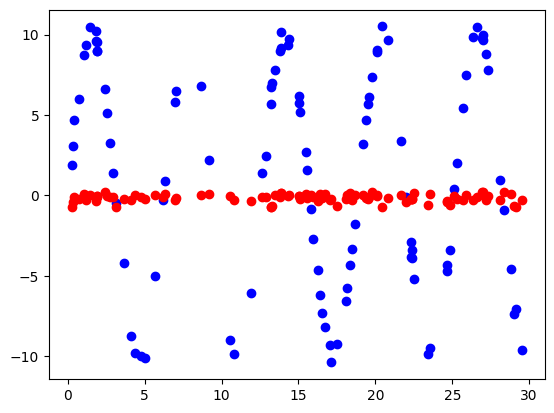

In [8]:
# 모델 학습 결과 시각화 및 비교

plt.scatter(x_tensor.numpy(), y_tensor.numpy(), color='blue', label='Data Points')
plt.scatter(x_tensor.numpy(), predicted.numpy(), color='red', label='MSFR Prediction')